# **Advanced Digital Signal Processing (ADSP) Lab - Python Lab Manual**
> **Course Code:** EEE G613 \
**IC:** Dr. Rajesh Kumar Tripathy \
**TA:** Shaswati Dash\
**Lab Technician:** Ramesh Pokanati





**********************************************
**********************************************

# **Experiment No. - 3**

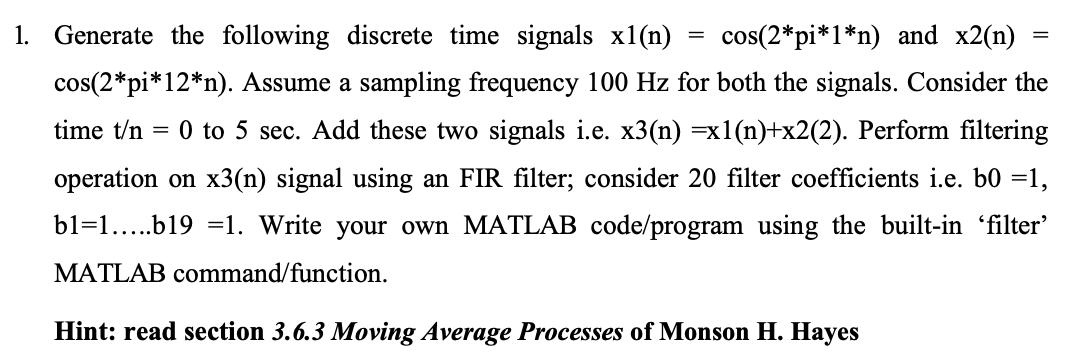

# *Python Code:*

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

In [2]:
# Function to generate discrete time signal
def generate_signal(frequency, sampling_rate, duration):
  t = np.arange(0, duration, 1/sampling_rate)
  signal = np.cos(2 * np.pi * frequency * t)
  return t, signal
# Generate signals x1(n) and x2(n)
fs = 100 # Sampling frequency (Hz)
duration = 5 # Duration of the signal (seconds)
t1, x1 = generate_signal(1, fs, duration)
t2, x2 = generate_signal(12, fs, duration)
# Add the signals to create x3(n)
x3 = x1 + x2
# FIR filter coefficients
filter_coefficients = np.ones(20)
# Filter the signal x3(n)
filtered_signal = lfilter(filter_coefficients,1,x3)

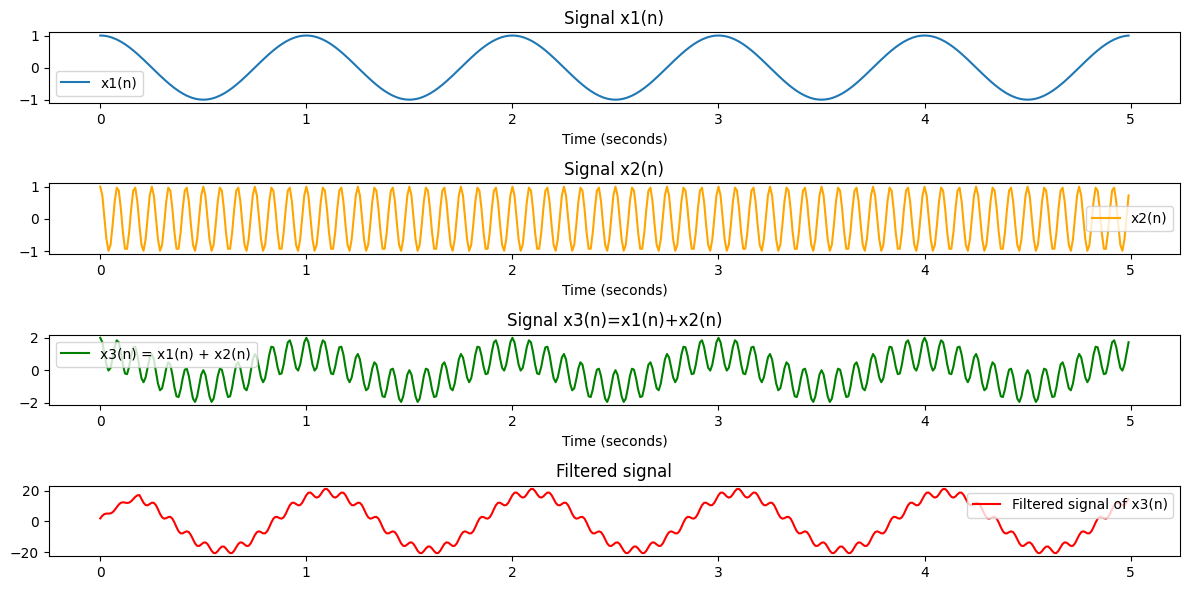

In [3]:
# Plotting the original signals and the filtered signal
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(t1, x1, label='x1(n)')
plt.title('Signal x1(n)')
plt.xlabel('Time (seconds)')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(t2, x2, label='x2(n)', color='orange')
plt.title('Signal x2(n)')
plt.xlabel('Time (seconds)')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(t1, x3, label='x3(n) = x1(n) + x2(n)', color='green')
plt.title('Signal x3(n)=x1(n)+x2(n)')
plt.xlabel('Time (seconds)')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(t1, filtered_signal, label='Filtered signal of x3(n)', color='red')
plt.title('Filtered signal')
plt.legend()
plt.tight_layout()
plt.show()

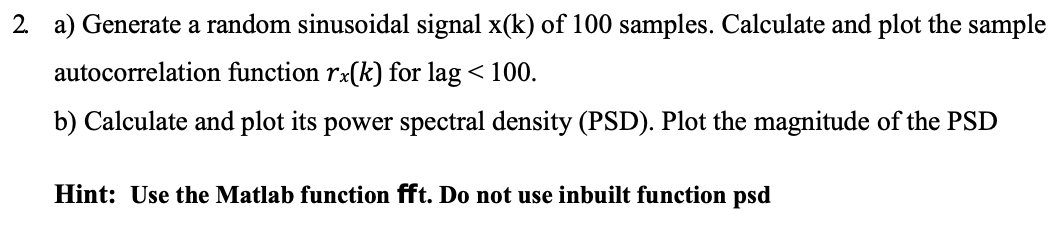

# *Python Code:*

In [4]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

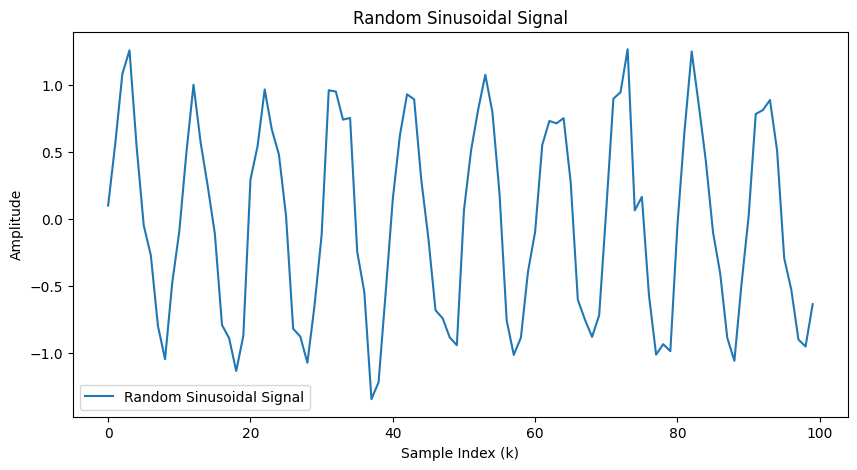

In [5]:
# Generate a random sinusoidal signal
np.random.seed(42) # Setting seed for reproducibility
k = np.arange(100)
x = np.sin(2 * np.pi * 0.1 * k) + 0.2 * np.random.randn(100)
# Plot the signal
plt.figure(figsize=(10, 5))
plt.plot(k, x, label='Random Sinusoidal Signal')
plt.title('Random Sinusoidal Signal')
plt.xlabel('Sample Index (k)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
# Calculate the sample autocorrelation function
rx = np.correlate(x, x, mode='full')

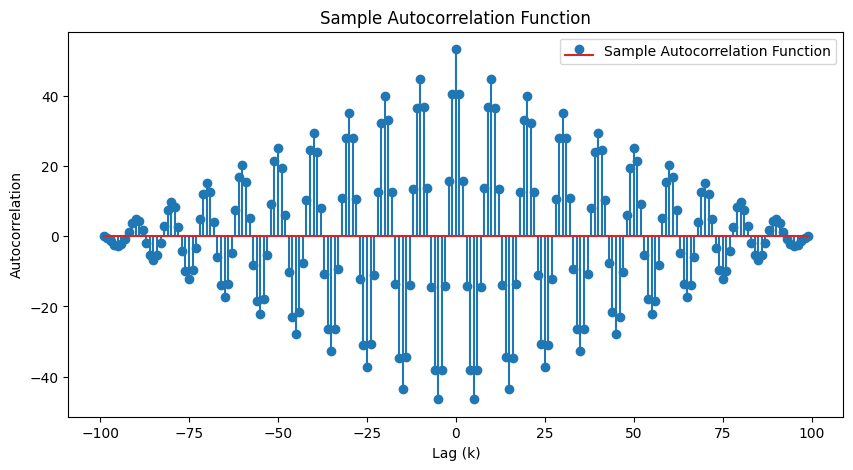

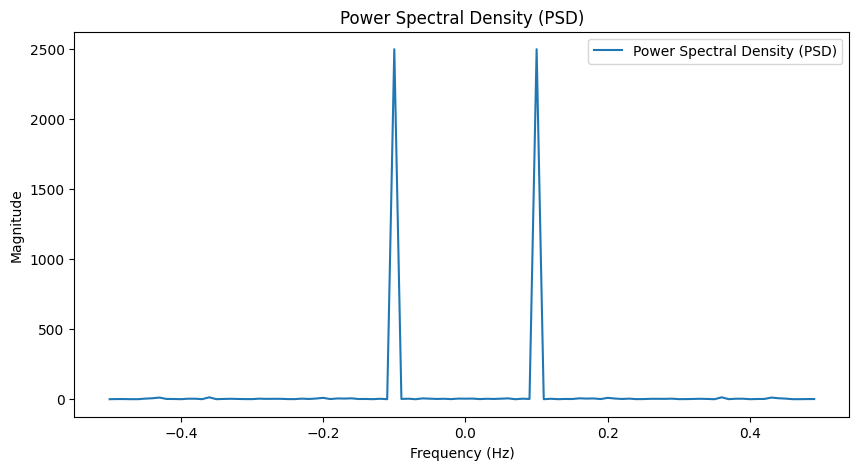

In [6]:
# Plot the autocorrelation function
lags = np.arange(-99, 100)
plt.figure(figsize=(10, 5))
plt.stem(lags, rx[:199], label='Sample Autocorrelation Function')
plt.title('Sample Autocorrelation Function')
plt.xlabel('Lag (k)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()
# Calculate the power spectral density (PSD)
frequencies = np.fft.fftshift(np.fft.fftfreq(100))
X = np.fft.fftshift(np.fft.fft(x))
PSD = np.abs(X) ** 2
# Plot the magnitude of the PSD
plt.figure(figsize=(10, 5))
plt.plot(frequencies, PSD, label='Power Spectral Density (PSD)')
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

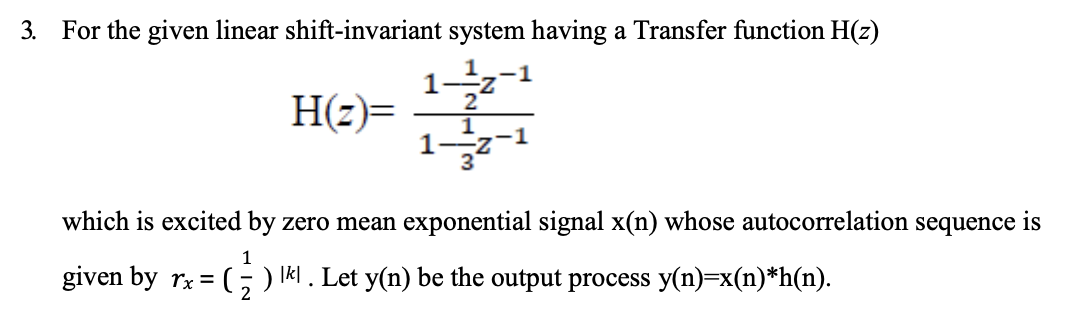

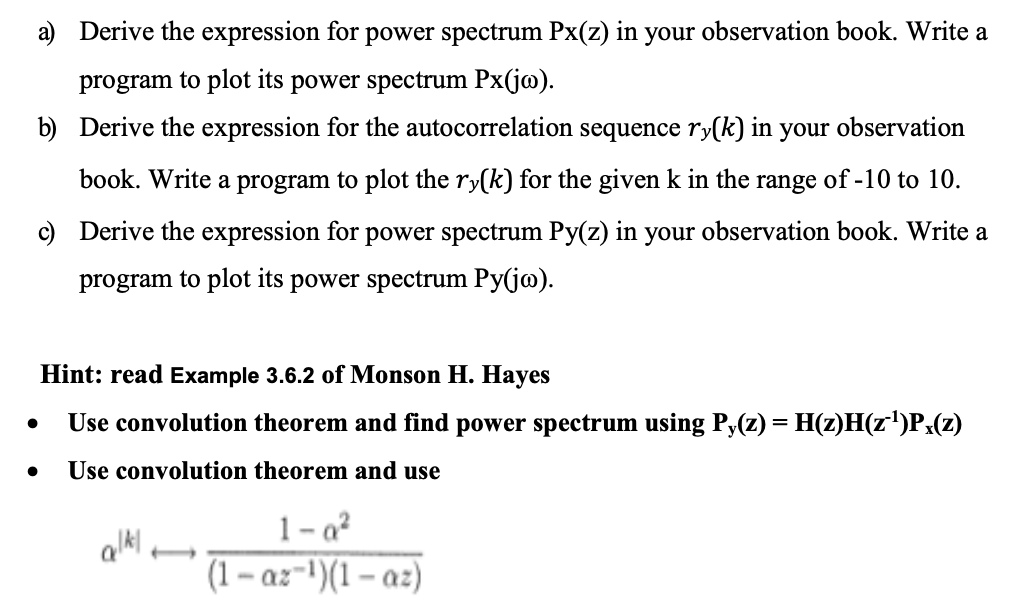

# *Python Code:*

In [7]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Constants
r = 1
w = np.arange(0, 2 * np.pi + np.pi / 10, np.pi / 10)
z = r * (np.exp(-1j * w))
H = (1 - 0.5 * (z ** -1)) / (1 - (1 / 3) * (z ** -1))
H_inv = (1 - 0.5 * z) / (1 - (1 / 3) * z)
k = np.arange(-10, 11)
Rx = 0.5 ** np.abs(k)
PSDx = np.fft.fft(Rx)
Py = PSDx * H * H_inv
Ry = np.abs(np.fft.ifft(Py))

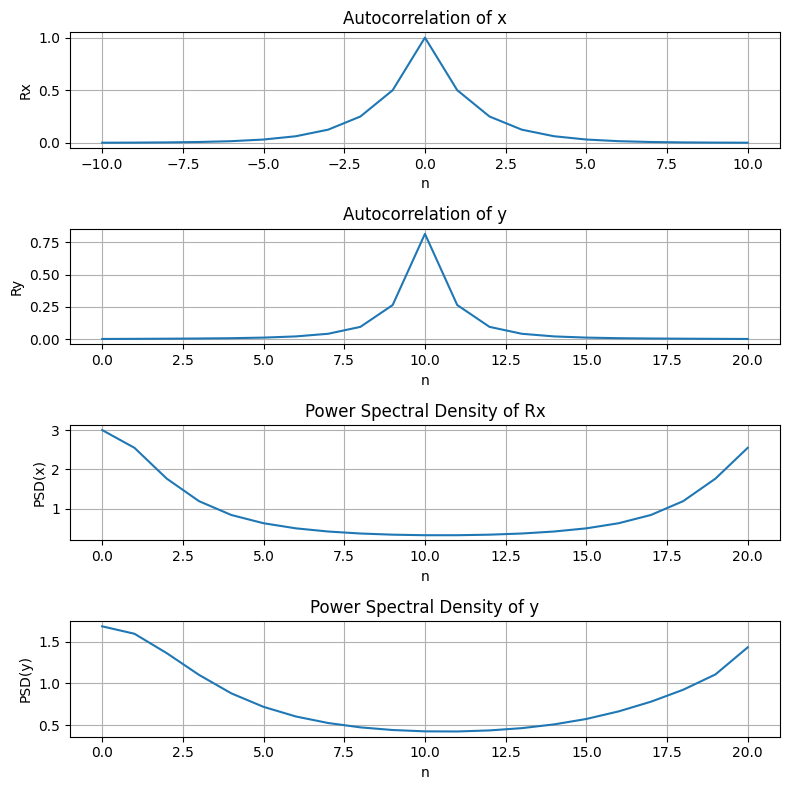

In [9]:
# Plotting
plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(k, Rx)
plt.title('Autocorrelation of x')
plt.xlabel('n')
plt.ylabel('Rx')
plt.grid(True)
plt.subplot(4, 1, 2)
plt.plot(np.abs(Ry))
plt.title('Autocorrelation of y')
plt.xlabel('n')
plt.ylabel('Ry')
plt.grid(True)
plt.subplot(4, 1, 3)
plt.plot(np.abs(PSDx))
plt.title('Power Spectral Density of Rx')
plt.xlabel('n')
plt.ylabel('PSD(x)')
plt.grid(True)
plt.subplot(4, 1, 4)
plt.plot(np.abs(Py))
plt.title('Power Spectral Density of y')
plt.xlabel('n')
plt.ylabel('PSD(y)')
plt.grid(True)
plt.tight_layout()
plt.show()

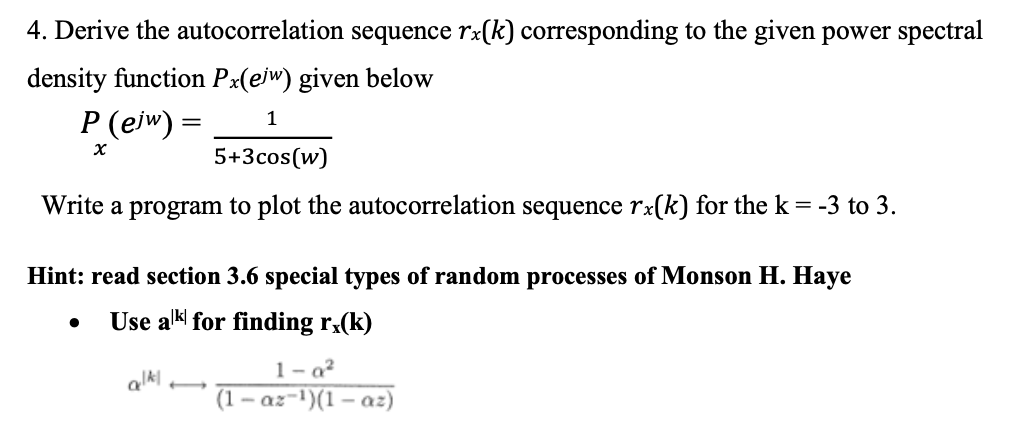

# *Python Code:*

In [10]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Constants
fs = 50
k = np.arange(0, 1, 1/fs)
f = k * fs
w = 2 * np.pi * k
PSD = 1 / (5 + 3 * np.cos(w))
# Compute autocorrelation using inverse FFT
rx = np.abs(np.fft.ifft(PSD))

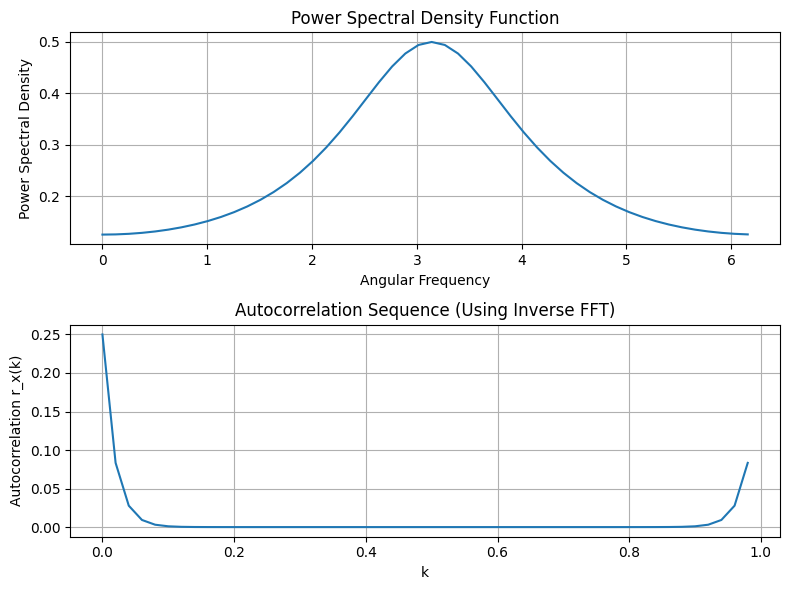

In [12]:
# Plotting
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(w, PSD)
plt.xlabel('Angular Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density Function')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(k, rx)
plt.xlabel('k')
plt.ylabel('Autocorrelation r_x(k)')
plt.title('Autocorrelation Sequence (Using Inverse FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()